In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from scipy.special import erf
from scipy import sparse
import numpy as np
import matplotlib.pyplot as plt
from mars_water_magma import one_dimension

In [3]:
# Physical Parameters
T0 = 162
TM = 300
KAPPA = 0.02

# Discretization
dz = 0.5
dt = 0.1 * dz / KAPPA
Nz = 1000
Nt = 1000

print(f"dt = {dt} s")
print(f"dz = {dz} m")

dt = 2.5 s
dz = 0.5 m


In [4]:
z = np.arange(0, Nz * dz, dz)
t = np.arange(0.0001, Nt * dt + 0.0001, dt)
Z, T = np.meshgrid(z, t)

sol = one_dimension.SemiInfiniteSpaceSolution(
    magma_temperature=TM,
    initial_temperature=T0,
    kappa=KAPPA,
)
print(sol.summary)
solution = sol.compute(Z, T)

-------------------
Model:
	Analytic Solution on a Semi Finite Space.
-------------------
Parameters:
	Initial temperature: 162°C
	Magma temperature: 300°C
	kappa : 0.02 W/m²
------------------



In [5]:
Z0 = np.full((Nz, Nt), T0, dtype=float)
Z0[0,0] = TM

In [6]:
sim = one_dimension.SemiInfiniteSpaceModel(
    magma_temperature=TM,
    initial_temperature=T0,
    kappa=KAPPA,
)
print(sim.summary)
sim.create_matrix(z_dim=Nz,dt=dt,dz=dz)
simulation = sim.compute(Z0, T)

-------------------
Model:
	Model on a Semi-Infinite Space.
-------------------
Parameters:
	Initial temperature: 162°C
	Magma temperature: 300°C
	kappa : 0.02 W/m²
------------------



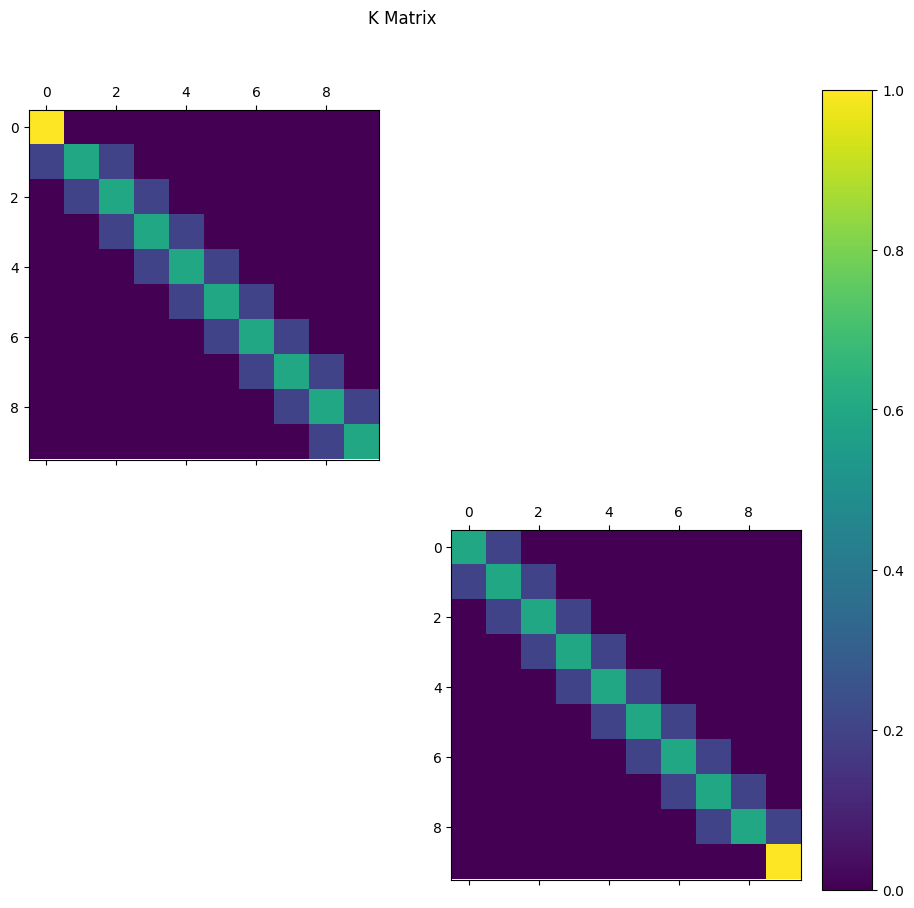

In [7]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle("K Matrix")

ax_up_left = plt.subplot(2, 2, 1)
ax_bottom_right = plt.subplot(2, 2, 4)


fig_up_left = ax_up_left.matshow(sim.matrix[:10, :10].toarray())
fig_bottom_left = ax_bottom_right.matshow(sim.matrix[-10:, -10:].toarray())

# Colorbar
cbar_ax = fig.add_axes([0.92, 0.1, 0.05, 0.8])
fig.colorbar(fig_up_left, cax=cbar_ax)
plt.show()

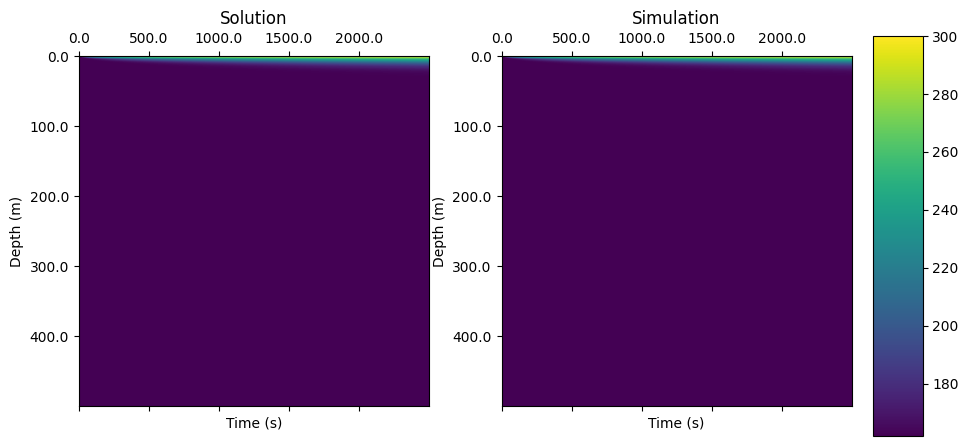

In [8]:
fig = plt.figure(figsize=(10, 10))

ax_sol = plt.subplot(2, 2, 1)
ax_sim = plt.subplot(2, 2, 2)

# Solution Plot
ax_sol.set_title("Solution")
ax_sol.set_xlabel("Time (s)")
ax_sol.set_xticks(
    ticks=[t for t in range(Nt)], labels=[t * dt for t in range(Nt)]
)
ax_sol.set_ylabel("Depth (m)")
ax_sol.set_yticks(
    ticks=[z for z in range(Nz)], labels=[z * dz for z in range(Nz)]
)
sol_plot = ax_sol.matshow(solution.T, vmin=T0, vmax=TM)

# Simulation Plot
ax_sim.set_title("Simulation")
ax_sim.set_xlabel("Time (s)")
ax_sim.set_xticks(
    ticks=[t for t in range(Nt)], labels=[t * dt for t in range(Nt)]
)
ax_sim.set_ylabel("Depth (m)")
ax_sim.set_yticks(
    ticks=[z for z in range(Nz)], labels=[z * dz for z in range(Nz)]
)
sim_plot = ax_sim.matshow(simulation.T, vmin=T0, vmax=TM)

# Colorbar
cbar_ax = fig.add_axes([0.92, 0.5, 0.05, 0.4])
fig.colorbar(sol_plot, cax=cbar_ax)

plt.show()

In [9]:
# Norm - Time

norm = np.power(np.abs(solution[-1, :] - simulation[-1, :]), 2)

print(f"Norm at a given time : {np.sqrt(dt * np.sum(norm))}")

# Norm - Space

norm = np.power(np.abs(solution[:, 50] - simulation[:, 50]), 2)

print(f"Norm at a given depth : {np.sqrt(dt * np.sum(norm))}")

Norm at a given time : 0.12494769980224135
Norm at a given depth : 0.030990652200483627
